In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,neighbors

In [105]:
#loading the data set
iris = datasets.load_iris()
 
X = iris.data #input feature
Y = iris.target #output feature
#print(X[:10])
#print(Y[:10])
no_of_sample = len(Y)
random_indicies = np.random.permutation(no_of_sample)

#splition the data set into train,test and validation sets
#traing set
x_train = X[random_indicies[:70]]
y_train = Y[random_indicies[:70]]
#validation set
x_val = X[random_indicies[70:85]]
y_val = Y[random_indicies[70:85]]
#test set
x_test = X[random_indicies[85:]]
y_test = Y[random_indicies[85:]]

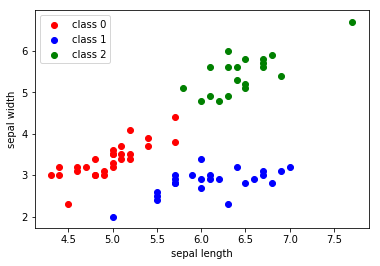

In [106]:
#visaulizing the traning data
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)
X_class2 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.ones((X_class2.shape[0]),dtype=np.int)


plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,2],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.show()


The nearest neighbors points :
 [[7.7 2.8 6.7 2. ]
 [6.8 3.2 5.9 2.3]
 [6.7 2.5 5.8 1.8]
 [6.5 3.  5.8 2.2]
 [6.9 3.1 5.4 2.1]]

The classes of the nearest neighbors: [2 2 2 2 2]



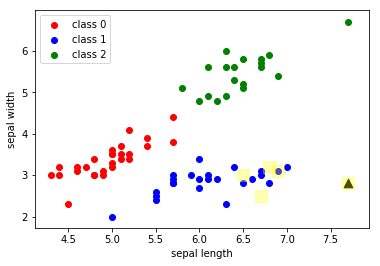

In [107]:
#fiting the model
#Creating the model instances
model = neighbors.KNeighborsClassifier(n_neighbors=5) #where k = (number of kneighbors)
model.fit(x_train,y_train)
model.predict(x_train)

#finding the distance and indices of 5 nerest point(k=5) 
distances_of_nearest_neighbors, indices_of_nearest_neighbors_of_query_point = model.kneighbors(x_train[:5])

#finnding the 5 nearest train data 
nearest_neighbors_of_query_point = x_train[indices_of_nearest_neighbors_of_query_point[0]]

#printing the 5 nearest train data
print("The nearest neighbors points :\n {}\n".format(nearest_neighbors_of_query_point))

#printing classes of the 5 nearest train data
print("The classes of the nearest neighbors: {}\n".format(y_train[indices_of_nearest_neighbors_of_query_point[0]]))

#ploting the all curve on traing data 
plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,2],color='green')
plt.scatter(x_train[:5][0][0], x_train[:5][0][1],marker='^',s=75,color='black')
plt.scatter(nearest_neighbors_of_query_point[:,0], nearest_neighbors_of_query_point[:,1],marker='s',s=150,color='yellow',alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.show()


In [108]:
#finding all accuracy train,validation, test
accuracy_train = model.score(x_train,y_train)
accuracy_val = model.score(x_val,y_val)
accuracy_test = model.score(x_test,y_test)
print("Accuracy on train Data      :",accuracy_train)
print("Accuracy on validation Data :",accuracy_val)
print("Accuracy on test Data       :",accuracy_test)

Accuracy on train Data      : 0.9857142857142858
Accuracy on validation Data : 1.0
Accuracy on test Data       : 0.9692307692307692
